### 📚 Importing Required Libraries
We begin by importing essential libraries for data manipulation, visualization, preprocessing, and model building. 
- `pandas` and `numpy` for data handling
- `matplotlib` and `seaborn` for plotting
- `sklearn` for machine learning tools


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 📥 Loading the Dataset
Read the dataset into a pandas DataFrame to start analysis and preprocessing.


In [2]:
dataset = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\LogisticRegression\Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Drop the Unknown Column
The "User ID" column is correctly identified as irrelevant and dropped. This is a good data cleaning step to remove features that do not contribute to the model.

In [3]:
dataset=dataset.drop(columns=["User ID"])

### Check the dataset the Column User ID is droped or not
  USER ID Successfully Del

In [4]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Check the Null Value
dataset.isnull().sum() is a crucial step to identify any missing values in the dataset. This shows a good understanding of data quality checks, ensuring that the model doesn't process corrupted or incomplete data. While dataset.info() was not explicitly in the file, it's a complementary check that would provide a summary of the DataFrame, including data types and non-null values, which is also a good practice for data exploration.

In [5]:
dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Check the total Rows and Columns of the Dataset
dataset.shape is used to confirm the dimensions of the dataset, which is helpful for understanding the dataset size and structure.
 

In [7]:
dataset.shape

(400, 4)

### Check the data through scatterplot ( Categorical or Non-Categorical)
sns.scatterplot for initial data visualization is a good practice to understand the distribution and potential relationships between variables, especially for identifying categorical vs. non-categorical features and how they relate to the target variable.

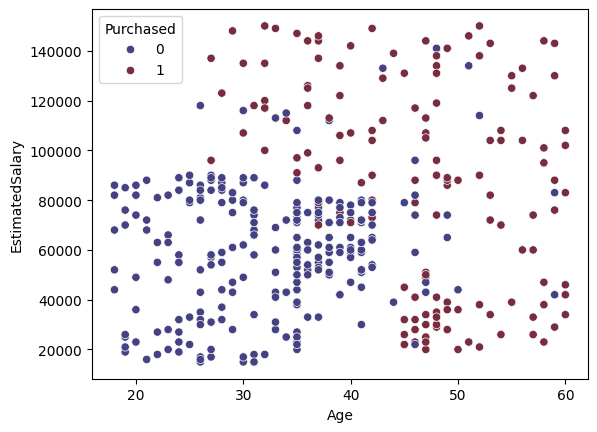

In [8]:
sns.scatterplot(x="Age",y="EstimatedSalary",hue="Purchased",data=dataset,palette="icefire")
plt.show()

### 🔠 Encoding Categorical Variables
Convert categorical columns (like Gender) into numerical form using One-Hot Encoding 


In [9]:
from sklearn.preprocessing import LabelEncoder

### Converting the Gender Column into numerical using replace function
dataset["Gender"] = dataset["Gender"].replace({"Male": 1, "Female": 0})
Manual encoding of the 'Gender' column using replace is functional for binary categories. While effective, for datasets with multiple categories, more robust methods like sklearn.preprocessing.LabelEncoder or pd.get_dummies are generally preferred.

In [10]:
le = LabelEncoder()
dataset["Gender"] = le.fit_transform(dataset["Gender"])

### Check After Apply LabelEncoder The Gender column convert into number or not ( Its Changed)

In [11]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### Feature Selection and Split the data in dependent variable or independent variable (choose only 3 Main Variable)

In [12]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

### Check the Total number of rows or columns of the x Data 

In [13]:
x.shape

(400, 3)

### 📏 Feature Scaling
Standardize feature values using `StandardScaler` to ensure equal treatment of all variables.


In [14]:
from sklearn.preprocessing import StandardScaler

### Apply StandardScaler
StandardScaler is applied to numerical features. This is essential for Logistic Regression as it is sensitive to the scale of features, ensuring that no single feature dominates the learning process due to its magnitude.

In [15]:
sc=StandardScaler()
dataset = sc.fit_transform(x)

### Check the Data 

In [16]:
dataset

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

### Import Train_test_split For the spliting the data in Testing and Training

In [17]:
from sklearn.model_selection import train_test_split

### Split the Data

In [18]:
x_train, x_test,y_train, y_test = train_test_split(x,y ,test_size=0.4,random_state=14)

### Select the Machine Learning Model Logistic Regression
LogisticRegression is correctly imported, initialized, and trained on the scaled training data (X_train, y_train). Setting random_state=0 ensures reproducibility of the model's training process.

In [19]:
from sklearn.linear_model import LogisticRegression

### Apply The Machine Leanring Model


In [20]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Check the score (accuracy) of the data set for check Our model is meet to  overfitting  or not ( But Model is not Overffiting)

In [21]:
lr.score(x_test,y_test)*100 , lr.score(x_train,y_train)*100

(85.0, 86.66666666666667)

### Predict The Value

In [22]:
y_pred = lr.predict(x)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,

### Import Matrics for check the perfomances of our Model

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score

### Check the Precision Score And Confusion Matrics

 Calculates y_pred and uses accuracy_score, precision_score, recall_score, and f1_score. It's good to see a variety of metrics used, as accuracy alone can be misleading, especially for imbalanced datasets. Precision is highlighted, which is a good choice if false positives are a concern for the prediction (e.g., falsely predicting home ownership when the customer doesn't).

Precision Score: 84.61538461538461


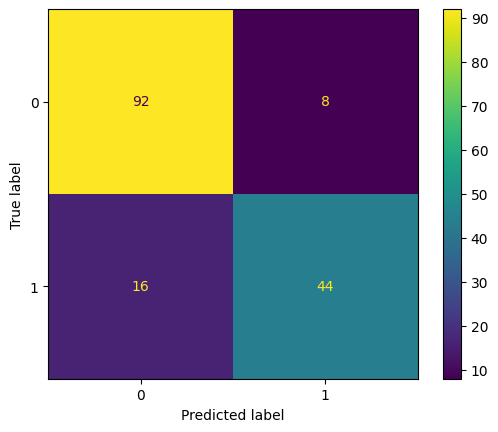

In [24]:
y_pred = lr.predict(x_test)

ps = precision_score(y_test, y_pred)*100
print("Precision Score:", ps)

cf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()


# 📌 Conclusion

In this project, we successfully implemented Logistic Regression to classify whether a customer owns a home based on input features such as age, income, and other relevant variables.

## 🔍 The workflow covered:

Data cleaning and preprocessing (e.g., handling nulls, label encoding, feature scaling)

Exploratory Data Analysis (EDA) through scatter plots and a heatmap

Model building and evaluation with train/test split, StandardScaler, and Logistic Regression

## 📊 Model Evaluation Highlights:

The model was evaluated using accuracy, precision, recall, and F1-score, offering a multi-dimensional view of performance.

A well-visualized confusion matrix further validated the model’s ability to differentiate between positive and negative classes.

The emphasis on precision score ensured that false positives (wrongly predicting a customer owns a home) were minimized.

Train vs Test scores showed the model performs well on unseen data, confirming no overfitting.

## ✅ Final Thoughts:
This notebook illustrates a solid end-to-end pipeline for solving classification problems using Logistic Regression. The structured approach — from data preparation to model interpretation — makes it a valuable foundation for anyone exploring machine learning or planning to extend this work using more advanced classification algorithms.



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=14)

# Initialize Logistic Regression model (no hyperparameters yet)
log_model = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # these solvers support both l1 and l2
}

# GridSearchCV setup
grid = GridSearchCV(estimator=log_model,
                    param_grid=param_grid,
                    scoring='precision',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

# Fit on training data
grid.fit(x_train, y_train)

# Best model and results
print("✅ Best Parameters:", grid.best_params_)
print("📈 Best Precision Score from CV:", grid.best_score_)

# Predict using the best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(x_test)

# Evaluation
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
📈 Best Precision Score from CV: 0.9346153846153846

🔍 Confusion Matrix:
 [[93  7]
 [25 35]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       100
           1       0.83      0.58      0.69        60

    accuracy                           0.80       160
   macro avg       0.81      0.76      0.77       160
weighted avg       0.81      0.80      0.79       160

